In [1]:
import matplotlib
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

### Simulation 1 - lane change trajectory

extract recordings

In [3]:
a = np.load("results/report_sim1.npz")

x = a["xRL_to_rxL"][5::10] # 10: localization takes place every 10 vehicle sim steps, 5: center-aligned
y = a["yRL_to_rxL"][5::10]
h = a["hdg"][5::10]
t = a["s_veh_clock"][5::10]
cls_x_drb = a["cls_x_directbearing"] # all of the vars below are of size (localization_num_steps, iterations)
cls_y_drb = a["cls_y_directbearing"]
cls_x_drr = a["cls_x_directrange"]
cls_y_drr = a["cls_y_directrange"]
cls_x_dfb = a["cls_x_diffbearing"]
cls_y_dfb = a["cls_y_diffbearing"]
run_x_drr = a["run_rxL_x_directrange"]
run_y_drr = a["run_rxL_y_directrange"]

plot trajectory

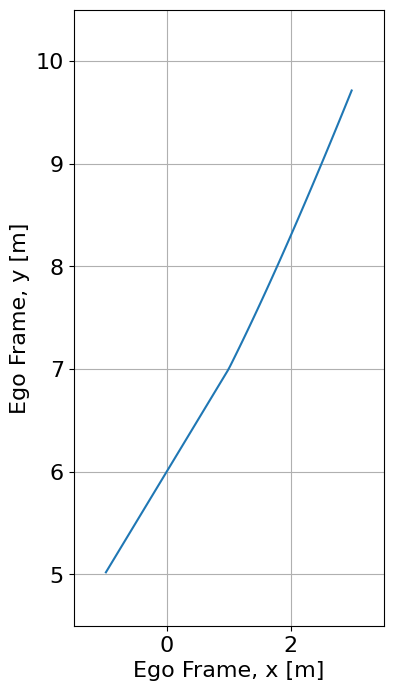

In [4]:
figure(figsize=(4, 8), dpi=100)
plt.plot(x, y)
plt.ylim([4.5, 10.5])
plt.xlim([-1.5, 3.5])
plt.ylabel("Ego Frame, y [m]")
plt.xlabel("Ego Frame, x [m]")
plt.grid()
plt.savefig("results/report_sim1_trj.png")

plot results over that trajectory

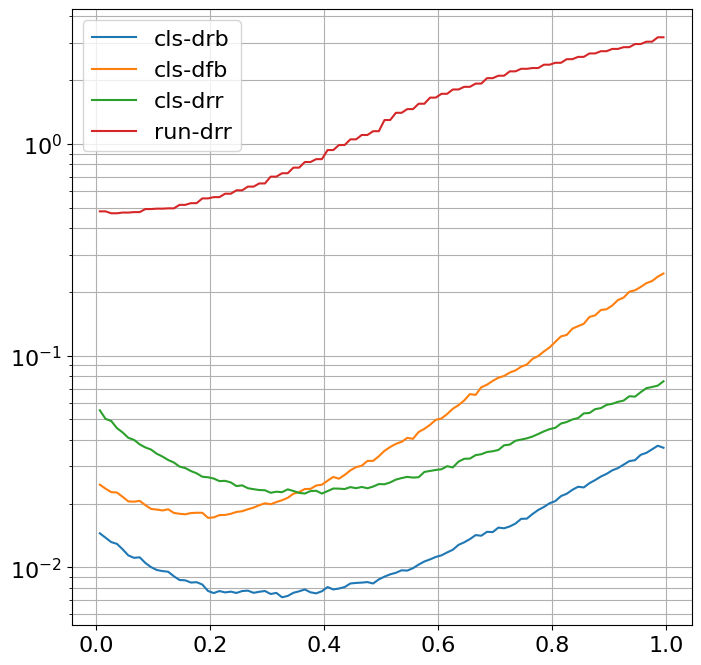

In [5]:
figure(figsize=(8, 8), dpi=100)
std_cls_x_drb = np.std(cls_x_drb - np.expand_dims(x,-1), axis=-1)
std_cls_y_drb = np.std(cls_y_drb - np.expand_dims(y,-1), axis=-1)
std_cls_x_drr = np.std(cls_x_drr - np.expand_dims(x,-1), axis=-1)
std_cls_y_drr = np.std(cls_y_drr - np.expand_dims(y,-1), axis=-1)
std_cls_x_dfb = np.std(cls_x_dfb - np.expand_dims(x,-1), axis=-1)
std_cls_y_dfb = np.std(cls_y_dfb - np.expand_dims(y,-1), axis=-1)
std_run_x_drr = np.std(run_x_drr - np.expand_dims(x,-1), axis=-1)
std_run_y_drr = np.std(run_y_drr - np.expand_dims(y,-1), axis=-1)
plt.semilogy(t, np.sqrt(std_cls_x_drb**2 + std_cls_y_drb**2))
plt.semilogy(t, np.sqrt(std_cls_x_dfb**2 + std_cls_y_dfb**2))
plt.semilogy(t, np.sqrt(std_cls_x_drr**2 + std_cls_y_drr**2))
plt.semilogy(t, np.sqrt(std_run_x_drr**2 + std_run_y_drr**2))
plt.legend(["cls-drb", "cls-dfb", "cls-drr", "run-drr"])
plt.grid(which="both")
plt.savefig("results/report_sim1_res.png")

### Simulation 2 - heatmap crlb

In [6]:
a = np.load("results/report_sim2.npz")

x = a["xRL_to_rxL"]
y = a["yRL_to_rxL"]
h = a["hdg"]
aoa_rxL_txL_map = a["aoa_rxL_txL_map"]
aoa_rxR_txL_map = a["aoa_rxR_txL_map"]
d_rxL_txL_map = a["d_rxL_txL_map"]
d_rxR_txL_map = a["d_rxR_txL_map"]
W_aoaL_map = a["W_aoaL_map"]
W_aoaR_map = a["W_aoaR_map"]
W_dL_map = a["W_dL_map"]
W_dR_map = a["W_dR_map"]
crlb_x_drr_map = np.sqrt(a["crlb_x_drr_map"])
crlb_y_drr_map = np.sqrt(a["crlb_y_drr_map"])
crlb_x_drb_map = np.sqrt(a["crlb_x_drb_map"])
crlb_y_drb_map = np.sqrt(a["crlb_y_drb_map"])

In [7]:
set_vmax = np.log10(np.max((np.nanmax(crlb_x_drr_map), np.nanmax(crlb_y_drr_map), np.nanmax(crlb_x_drb_map), np.nanmax(crlb_y_drb_map))))
set_vmin = np.log10(np.min((np.nanmin(crlb_x_drr_map), np.nanmin(crlb_y_drr_map), np.nanmin(crlb_x_drb_map), np.nanmin(crlb_y_drb_map))))

mark the places where bearing measurement is not possible as nan in range measurement too

In [8]:
crlb_x_drr_map[np.logical_or(np.isnan(crlb_x_drb_map), np.isnan(crlb_y_drb_map))] = np.nan
crlb_y_drr_map[np.logical_or(np.isnan(crlb_x_drb_map), np.isnan(crlb_y_drb_map))] = np.nan

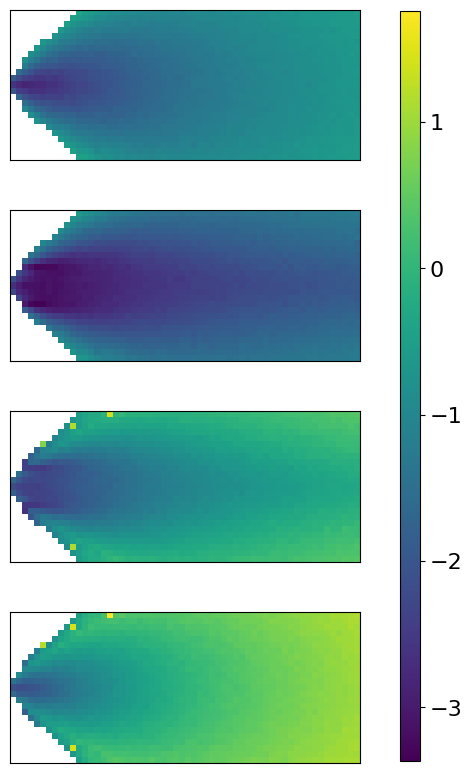

In [9]:
plotlist = [crlb_x_drr_map, crlb_y_drr_map, crlb_x_drb_map, crlb_y_drb_map]
fig, axs = plt.subplots(4,1,figsize=(20, 10),dpi=100)
for idd in range(4):
    ax = axs[idd]
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plotid = ax.imshow(np.log10(plotlist[idd]), vmin = set_vmin, vmax = set_vmax)
    #fig.colorbar(plotid, ax=ax)

fig.subplots_adjust(right=0.3)
cbar_ax = fig.add_axes([0.32, 0.12, 0.01, 0.75])
fig.colorbar(plotid, cax=cbar_ax)

plt.savefig("results/report_sim2_res.png")